##### Name: Chetan Prajapati

##### Title: Exploratory Data Analysis (EDA) on Retail Sales Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data prepration and cleaning

In [3]:
df = pd.read_csv("customer_shopping_data.csv")
print(df.head(5))
print("*"*100)
print(df.tail(5))

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
****************************************************************************************************
      invoice_no customer_id  gender  age         category  quantity    price  \
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  sales           99457 non-null  float64       
 11  year            99457 non-null  int32         
 12  month           99457 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(6)
memory usage: 9.1+ MB


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  sales           99457 non-null  float64       
 11  year            99457 non-null  int32         
 12  month           99457 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(6)
memory usage: 9.1+ MB


In [107]:
df.shape

(99457, 13)

In [5]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### We change date type format on invoice_date

In [119]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'],format = "%d%m/%Y")


### we create function for checking statistic of numerical column

In [67]:
def statistic_cal(df,columns):
    stats = {}           # dict constructor

    for i in columns:
        mean = df[i].mean()
        median = df[i].median()
        mode = df[i].mode()
        std = df[i].std()

        stats[i] = {
            "mean" : mean,
            "median" : median,
            "mode" : mode,
            "standard deviation" : std
        }
    return stats

statistics_calculation = statistic_cal(df,['age','quantity','price'])
print(statistics_calculation)

{'age': {'mean': 43.42708909377922, 'median': 43.0, 'mode': 0    37
Name: age, dtype: int64, 'standard deviation': 14.990053791852299}, 'quantity': {'mean': 3.003428617392441, 'median': 3.0, 'mode': 0    3
Name: quantity, dtype: int64, 'standard deviation': 1.413025134305319}, 'price': {'mean': 689.2563209226097, 'median': 203.3, 'mode': 0    600.16
Name: price, dtype: float64, 'standard deviation': 941.1845672157425}}


In [10]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

### Descriptive statistics

In [17]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [15]:
df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

### We create sales column  

In [121]:
df['sales'] = df['price'] * df['quantity']

## Time series analysis

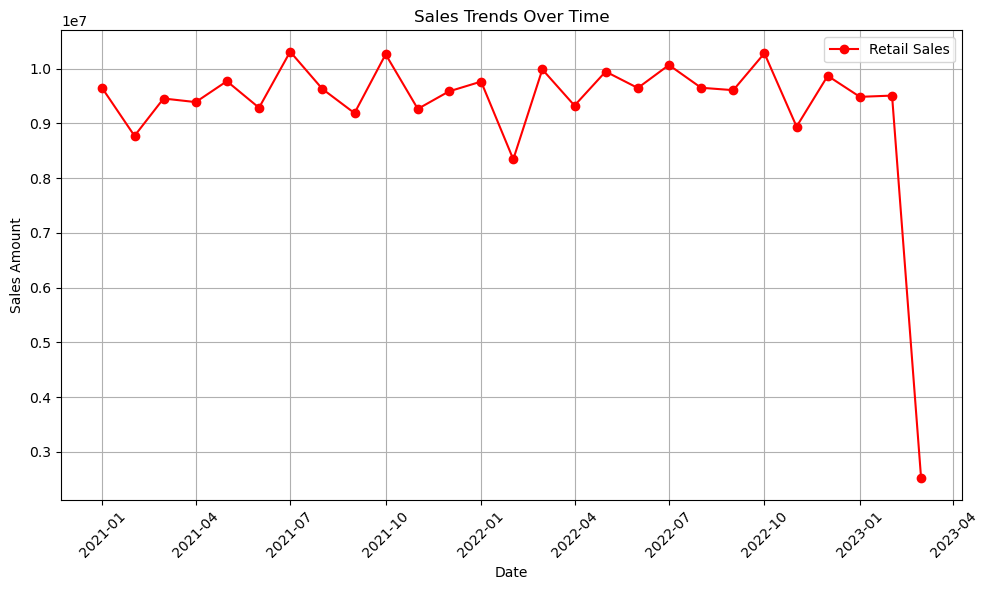

In [139]:
df['date'] =pd.to_datetime(df[['year', 'month']].assign(day=1))
monthly_sales = df.groupby('date')['sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Retail Sales', color='r', marker='o')

plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

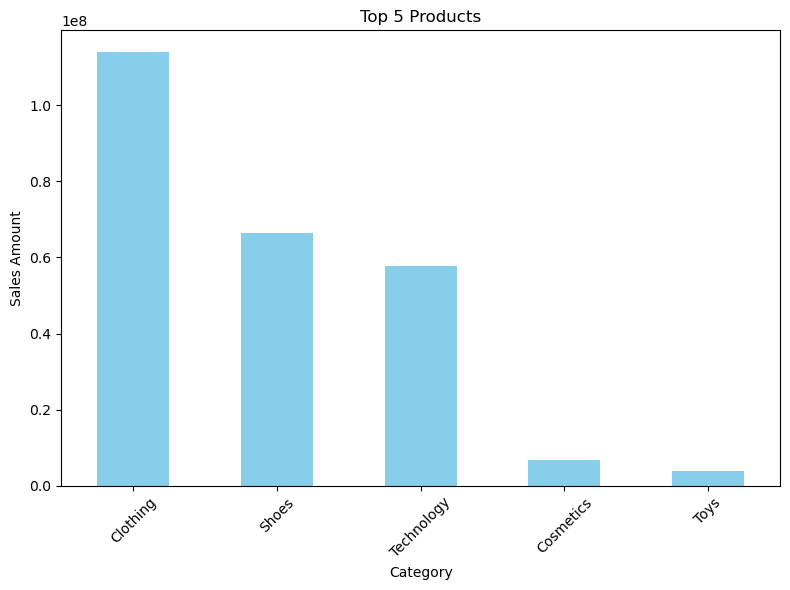

In [182]:
Sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending = False).head(5)

plt.figure(figsize=(8, 6))
Sales_by_category.plot(kind='bar', color='skyblue', label='category')
plt.title('Top 5 Products')
plt.ylabel('Sales Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# display customer count by gender


,customer_id
gender,
Female,59482
Male,39975


<Figure size 600x400 with 0 Axes>

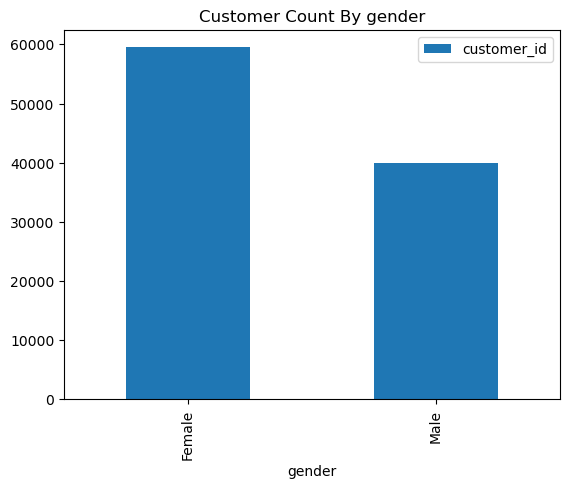

<Figure size 600x400 with 0 Axes>

In [183]:
cus_by_gender = df.groupby("gender").agg({"customer_id":"count"})
cus_by_gender.plot(kind = 'bar')

plt.title("Customer Count By gender")
plt.figure(figsize =(6,4))

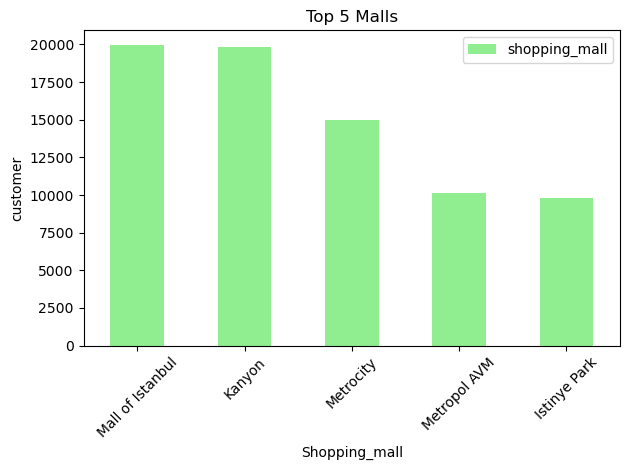

In [176]:
top5_malls = df.groupby('shopping_mall')['customer_id'].count().sort_values(ascending=False).head(5)
top5_malls.plot(kind='bar', color='lightgreen', label='shopping_mall')
plt.title('Top 5 Malls')
plt.ylabel('customer')
plt.xlabel('Shopping_mall')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

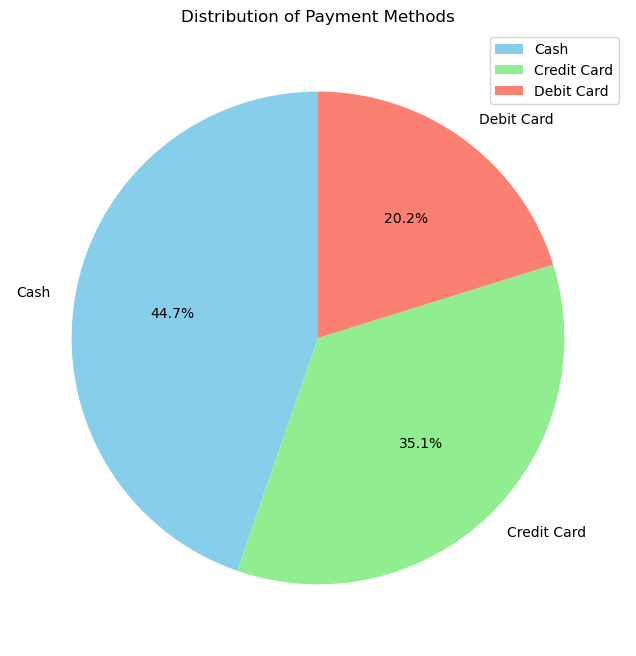

In [190]:
payment_method = df.groupby('payment_method').agg({'payment_method' : 'count'})
payment_method.columns = ['count']

# Plotting a pie chart
payment_method['count'].plot.pie(
    autopct='%1.1f%%',  # Display percentage values
    startangle=90,      # Start angle of the pie chart
    colors=['skyblue', 'lightgreen', 'salmon'],  # Colors for each section
    figsize=(8, 8),     # Figure size
    labels=payment_method.index,  # Set labels
    legend=True         # Display the legend
)

plt.title('Distribution of Payment Methods')
plt.ylabel('')  # Hides the default y-axis label
plt.show()